# Lead scoring case study

## <strong><span style="color:brown">Step 1: Importing Libraries and Data</span></strong>

### 1.1 Import Libraries, Suppress Warnings and Set Display

In [2]:
#importing libraries

import numpy as np                                  # Linear Algebra
import pandas as pd                                 # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt                     # Data Visualization 
import seaborn as sns                               # Data Visualization

import warnings                                     # Filter Unwanted warnings
warnings.filterwarnings('ignore')

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
#Environment settings

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)


In [4]:
# Reading Dataset
dataset = pd.read_csv("Leads.csv")
dataset.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#checking shape of dataset
dataset.shape

(9240, 37)

## <strong><span style="color:brown">Step 2: Data Understanding and Inspection</span></strong>

In [6]:
# Check detail descriptive information.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
dataset.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#Check the unique columns in dataset

{i:sum(dataset.duplicated(subset= i))!=0 for i in dataset.columns}

{'Prospect ID': False,
 'Lead Number': False,
 'Lead Origin': True,
 'Lead Source': True,
 'Do Not Email': True,
 'Do Not Call': True,
 'Converted': True,
 'TotalVisits': True,
 'Total Time Spent on Website': True,
 'Page Views Per Visit': True,
 'Last Activity': True,
 'Country': True,
 'Specialization': True,
 'How did you hear about X Education': True,
 'What is your current occupation': True,
 'What matters most to you in choosing a course': True,
 'Search': True,
 'Magazine': True,
 'Newspaper Article': True,
 'X Education Forums': True,
 'Newspaper': True,
 'Digital Advertisement': True,
 'Through Recommendations': True,
 'Receive More Updates About Our Courses': True,
 'Tags': True,
 'Lead Quality': True,
 'Update me on Supply Chain Content': True,
 'Get updates on DM Content': True,
 'Lead Profile': True,
 'City': True,
 'Asymmetrique Activity Index': True,
 'Asymmetrique Profile Index': True,
 'Asymmetrique Activity Score': True,
 'Asymmetrique Profile Score': True,
 'I agree 

In [9]:
#check for duplicates
print( "Prospect ID: ", sum(dataset.duplicated(subset = 'Prospect ID')) == 0)

Prospect ID:  True


In [10]:
#check for duplicates
print("Lead Number: ", sum(dataset.duplicated(subset = 'Lead Number')) == 0)

Lead Number:  True


#### Details about dataset :

- It has 9240 rows and 37 columns.

- Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

- We will analyse and finalize whether to convert them to categorical or treat as integer.

- Clearly Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped

## <strong><span style="color:brown">Step 3: Exploratory data Analysis</span></strong>

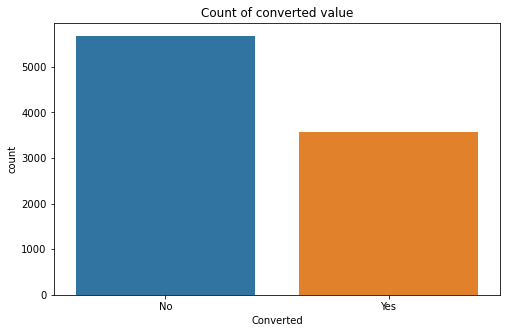

In [26]:
#visualizing count of Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(dataset['Converted'])
s1.set_xticklabels(['No','Yes'])
s1.set(title = 'Count of converted value')
plt.show()

In [10]:
# Creating a list of columns to drop

cols_to_drop = ['Prospect ID', 'Lead Number']

In [11]:
# Converting 'Select' values to NaN.

dataset = dataset.replace('Select', np.nan)

In [12]:
dataset.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [13]:
#checking null values in each rows

dataset.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

## 3.1 Handling missing values

In [14]:
# % of null value
round(100*(dataset.isnull().sum())/len(dataset.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [15]:


#dropping cols with more than 45% missing values

cols_to_drop.extend(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','Lead Profile','Lead Quality','How did you hear about X Education'])
cols_to_drop

['Prospect ID',
 'Lead Number',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Lead Profile',
 'Lead Quality',
 'How did you hear about X Education']

In [16]:
#checking null values percentage

round(100*(dataset.isnull().sum()/len(dataset.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

There is a huge value of null variables in some columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.

In [17]:
# Replacing Null values with not provided keyword so it will be easy to analyse
dataset['City'] = dataset['City'].fillna('not provided')
dataset['What matters most to you in choosing a course'] = dataset['What matters most to you in choosing a course'].fillna('not provided')
dataset['What is your current occupation'] = dataset['What is your current occupation'].fillna('not provided')
dataset['Country'] = dataset['Country'].fillna('not provided')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [18]:
#checking null values percentage

round(100*(dataset.isnull().sum()/len(dataset.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

### 3.2 Categorical Attributes Analysis:

In [19]:
#Lead Origin
dataset['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

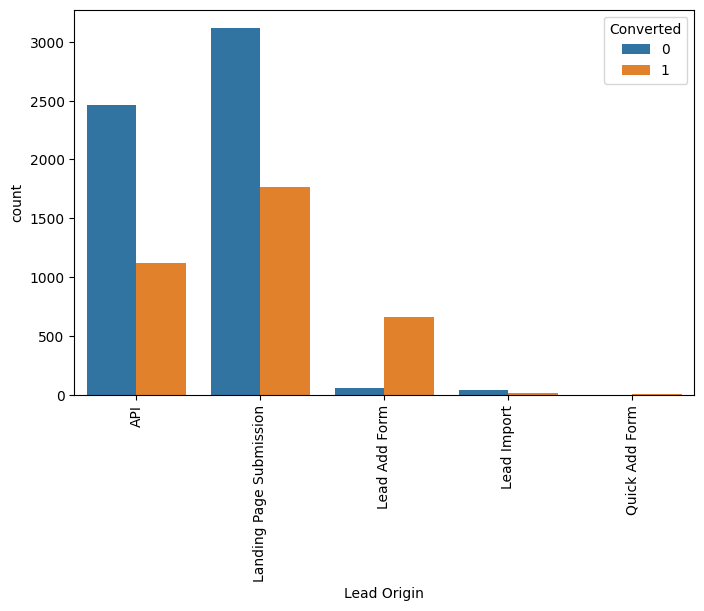

In [20]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(data = dataset, x = 'Lead Origin', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


Inference

- API and Landing Page Submission bring higher number of leads as well as conversion.
- Lead Add Form has a very high conversion rate but count of leads are not very high.
- Lead Import and Quick Add Form get very few leads.
- In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

In [21]:
#checking value counts of Lead Source column

dataset['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [22]:
# replacing Nan Values and combining low frequency values
dataset['Lead Source'] = dataset['Lead Source'].replace(np.nan,'Others')
dataset['Lead Source'] = dataset['Lead Source'].replace('google','Google')
dataset['Lead Source'] = dataset['Lead Source'].replace('Facebook','Social Media')
dataset['Lead Source'] = dataset['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                                                   

We can group some of the lower frequency occuring labels under a common label 'Others' 

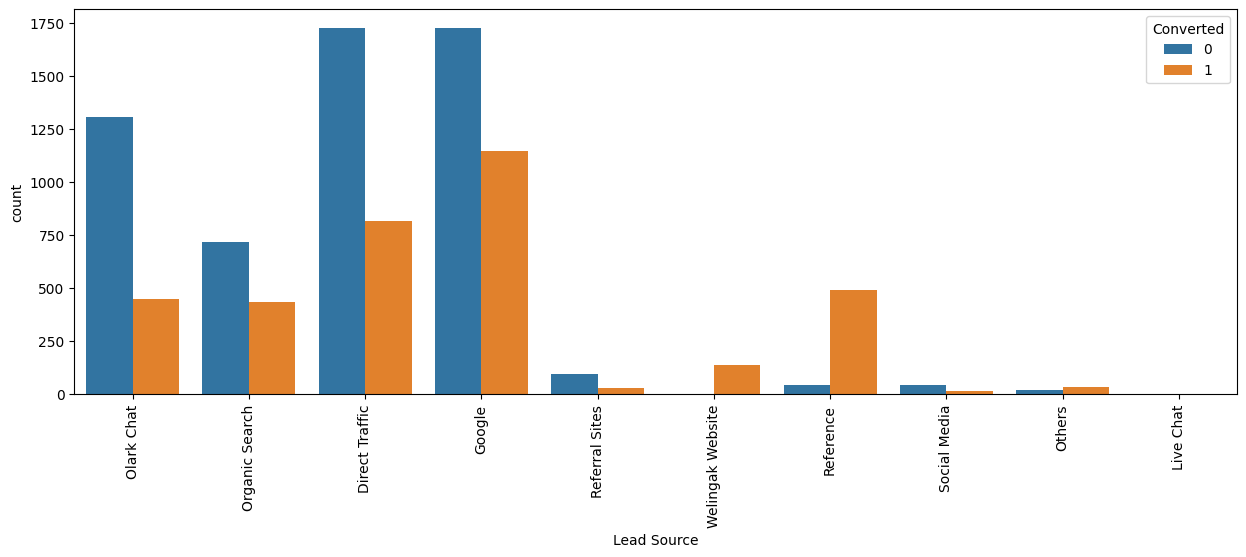

In [23]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(data = dataset, x = 'Lead Source' , hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [24]:
#checking value counts for Do Not Call
dataset['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [25]:
#checking value counts for Do Not Email
dataset['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

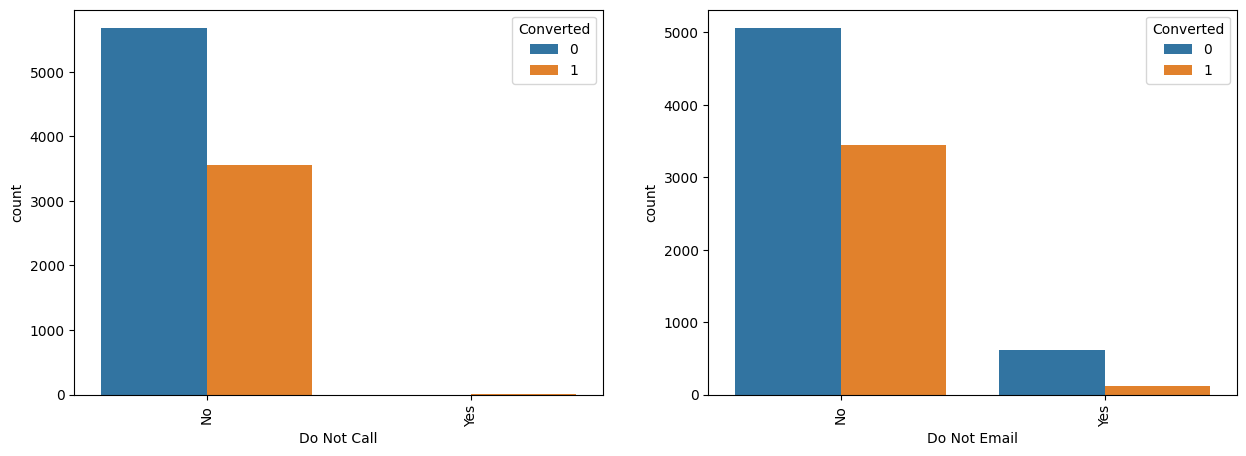

In [26]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(data = dataset, x = 'Do Not Call', hue = 'Converted')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(data = dataset, x = 'Do Not Email', hue = 'Converted')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

We Can append the **Do Not Call** Column to the list of Columns to be Dropped since > 90% is of only one Value

In [27]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Prospect ID',
 'Lead Number',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Lead Profile',
 'Lead Quality',
 'How did you hear about X Education',
 'Do Not Call']

In [28]:
# Last Activity:

dataset['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

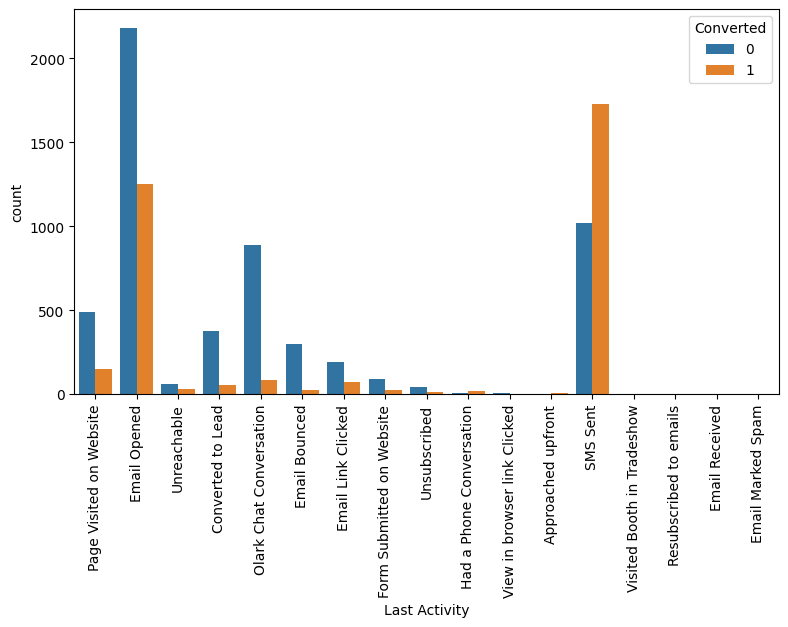

In [29]:
plt.figure(figsize=(20,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(data = dataset, x = 'Last Activity', hue = 'Converted')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

plt.show()

In [30]:
#replacing Nan Values and combining low frequency values

dataset['Last Activity'] = dataset['Last Activity'].replace(np.nan,'Others')
dataset['Last Activity'] = dataset['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [31]:
# Last Activity:

dataset['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

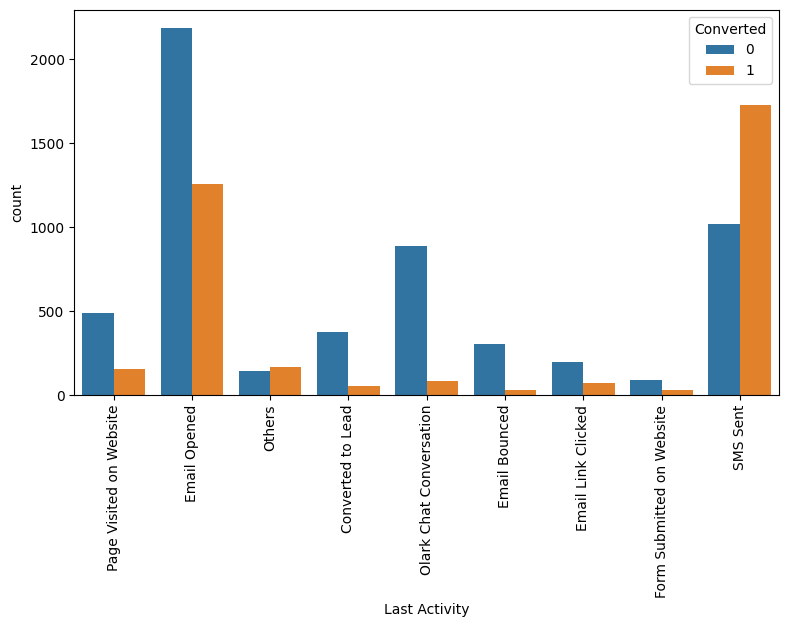

In [32]:
plt.figure(figsize=(20,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(data = dataset, x = 'Last Activity', hue = 'Converted')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

plt.show()

In [33]:
#checking value counts of Country column

dataset['Country'].value_counts(dropna=False)

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

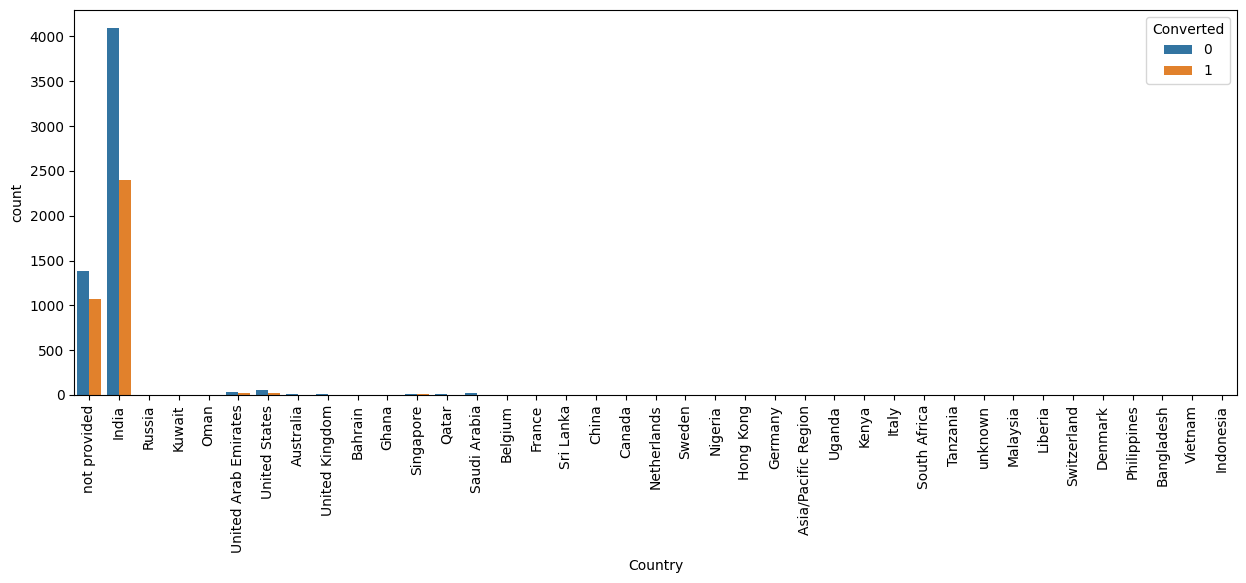

In [34]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(data = dataset, x = 'Country', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [35]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India

dataset['Country'] = dataset['Country'].replace('not provided','India')

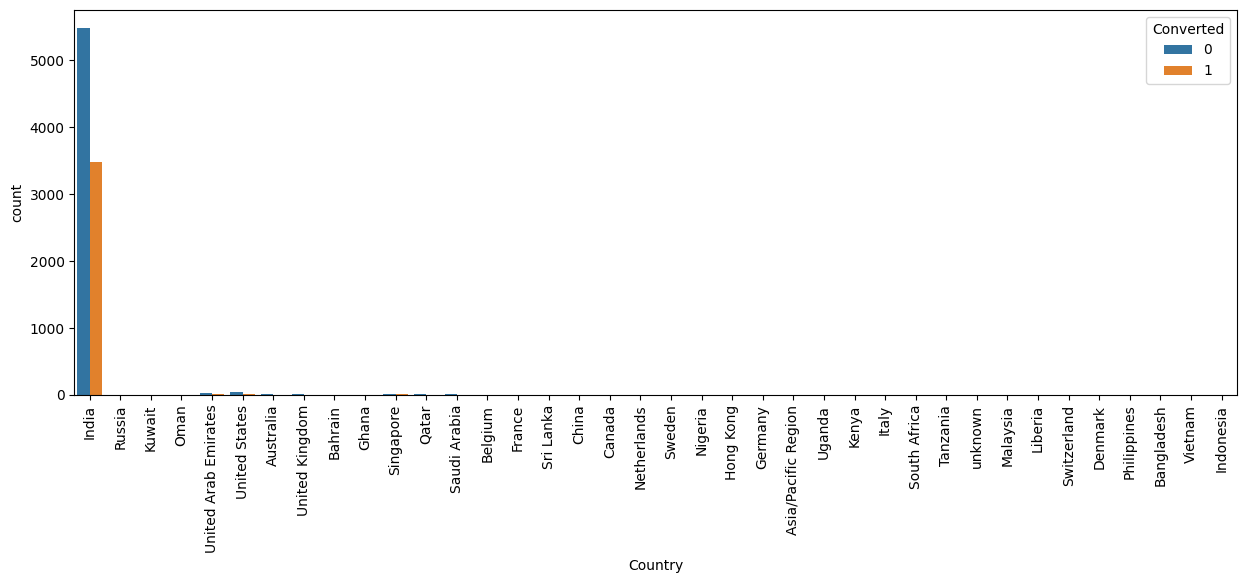

In [36]:
#plotting spread of Country columnn after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(data = dataset, x = 'Country', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**As we can see the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped**

In [37]:
#creating a list of columns to be droppped

cols_to_drop.append('Country')
cols_to_drop

['Prospect ID',
 'Lead Number',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Lead Profile',
 'Lead Quality',
 'How did you hear about X Education',
 'Do Not Call',
 'Country']

In [38]:
#checking value counts of Specialization column

dataset['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [39]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

dataset['Specialization'] = dataset['Specialization'].replace(np.nan, 'Not Specified')

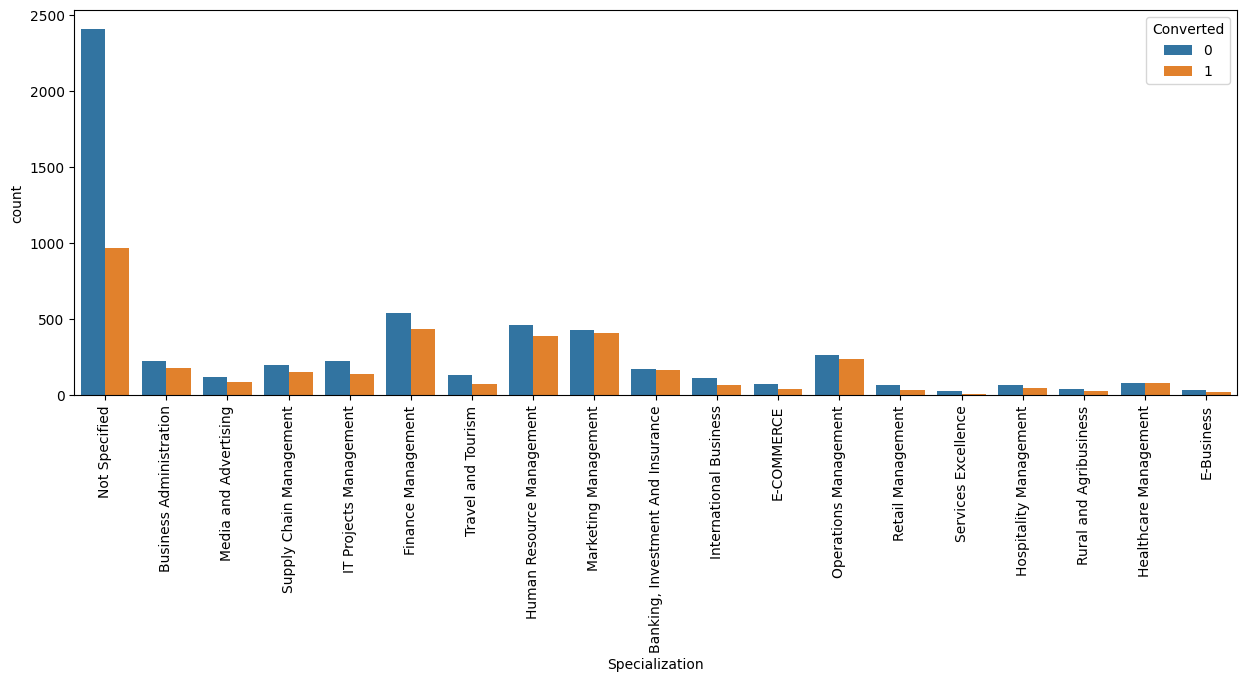

In [40]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(data = dataset, x = 'Specialization', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

We see that specialization with **Management** in them have higher number of leads as well as leads converted.
So this is definitely a significant variable and should not be dropped.

In [41]:
#combining Management Specializations because they show similar trends

dataset['Specialization'] = dataset['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

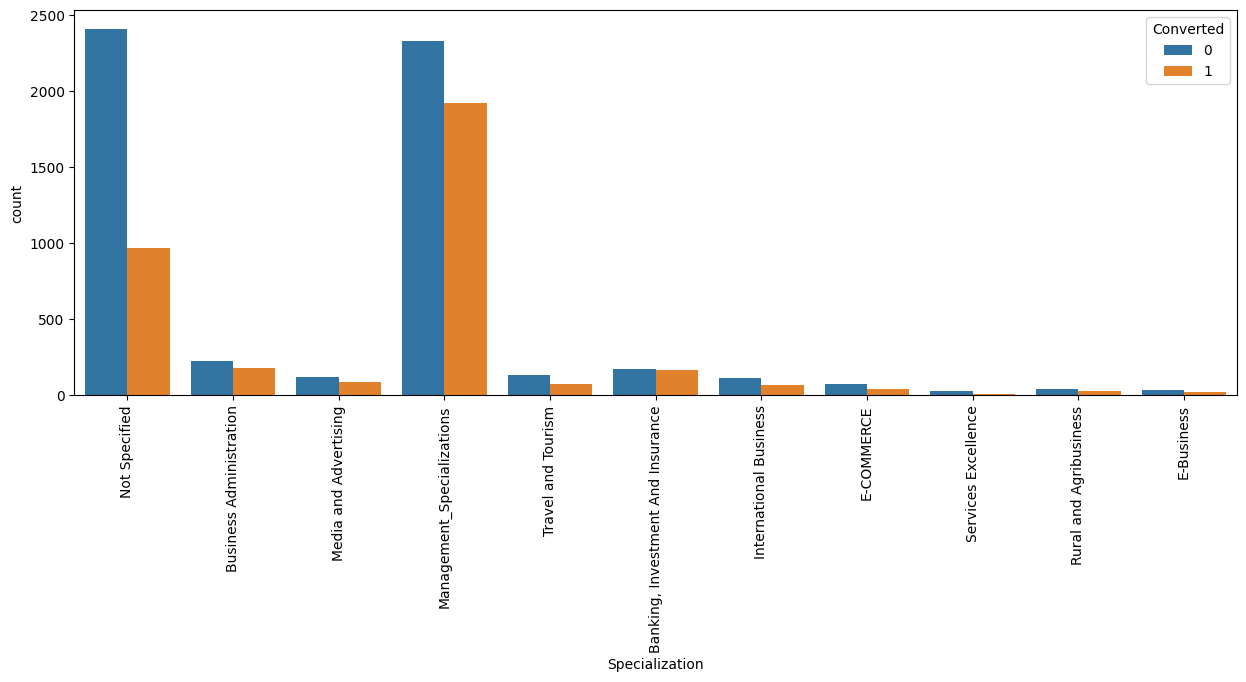

In [42]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s1=sns.countplot(data = dataset, x = 'Specialization', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**How did you hear about X Education**

This column has >45% null values so it is added in cols_to_drop list

In [43]:
#What is your current occupation# How did you hear about X Education
# This column has >45% null values so it is added in cols_to_drop list
dataset['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
not provided            2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [44]:
#imputing Nan values with mode "Unemployed"

dataset['What is your current occupation'] = dataset['What is your current occupation'].replace(np.nan, 'Unemployed')

In [45]:
#checking count of values
dataset['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
not provided            2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

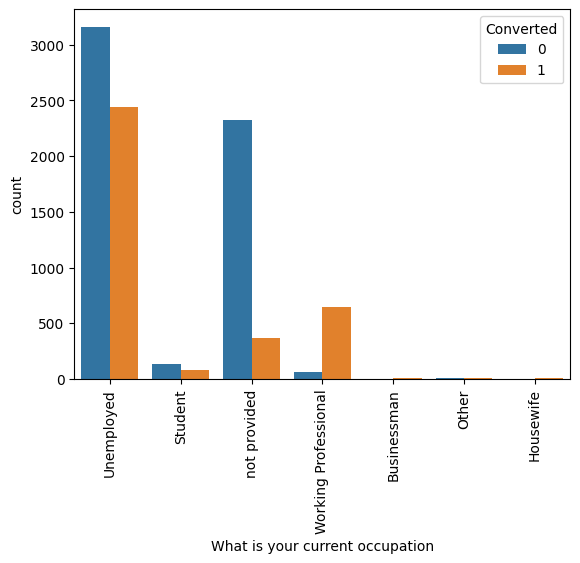

In [46]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(data = dataset, x = 'What is your current occupation', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in terms of Absolute numbers.

In [47]:
#checking value counts

dataset['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
not provided                 2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [48]:
#replacing Nan values with Mode "Better Career Prospects"

dataset['What matters most to you in choosing a course'] = dataset['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

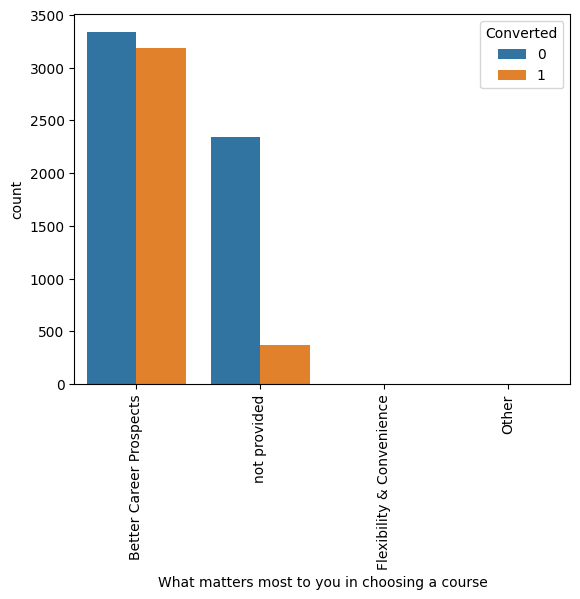

In [49]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(data = dataset, x = 'What matters most to you in choosing a course', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [50]:
#checking value counts of variable
dataset['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
not provided                 2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [51]:
#Here again we have another Column that is worth Dropping. So we adding to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Prospect ID',
 'Lead Number',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Lead Profile',
 'Lead Quality',
 'How did you hear about X Education',
 'Do Not Call',
 'Country',
 'What matters most to you in choosing a course']

In [52]:
# Search
dataset.Search.value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [53]:
# This column has imbalance values So we adding to the cols_to_drop List
cols_to_drop.append('Search')
cols_to_drop

['Prospect ID',
 'Lead Number',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Lead Profile',
 'Lead Quality',
 'How did you hear about X Education',
 'Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search']

In [54]:
# Newspaper Article
dataset['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [55]:
# This column has imbalance values So we adding to the cols_to_drop List
cols_to_drop.append('Newspaper Article')
cols_to_drop

['Prospect ID',
 'Lead Number',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Lead Profile',
 'Lead Quality',
 'How did you hear about X Education',
 'Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article']

In [56]:
dataset['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [57]:
# This column has imbalance values So we adding to the cols_to_drop List
cols_to_drop.append('X Education Forums')
cols_to_drop

['Prospect ID',
 'Lead Number',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Lead Profile',
 'Lead Quality',
 'How did you hear about X Education',
 'Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums']

In [58]:
dataset['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [59]:
# This column has imbalance values So we adding to the cols_to_drop List
cols_to_drop.append('Newspaper')
cols_to_drop

['Prospect ID',
 'Lead Number',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Lead Profile',
 'Lead Quality',
 'How did you hear about X Education',
 'Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper']

In [60]:
dataset['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [61]:
# This column has imbalance values So we adding to the cols_to_drop List
cols_to_drop.append('Digital Advertisement')
cols_to_drop

['Prospect ID',
 'Lead Number',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Lead Profile',
 'Lead Quality',
 'How did you hear about X Education',
 'Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement']

In [62]:
dataset['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [63]:
# This column has imbalance values So we adding to the cols_to_drop List
cols_to_drop.append('Through Recommendations')
cols_to_drop

['Prospect ID',
 'Lead Number',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Lead Profile',
 'Lead Quality',
 'How did you hear about X Education',
 'Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations']

In [64]:
dataset['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [65]:
# This column has imbalance values So we adding to the cols_to_drop List
cols_to_drop.append('Receive More Updates About Our Courses')
cols_to_drop

['Prospect ID',
 'Lead Number',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Lead Profile',
 'Lead Quality',
 'How did you hear about X Education',
 'Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses']

In [66]:
#checking value counts of Tag variable
dataset['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [67]:
#replacing Nan values with "Not Specified"
dataset['Tags'] = dataset['Tags'].replace(np.nan,'Not Specified')

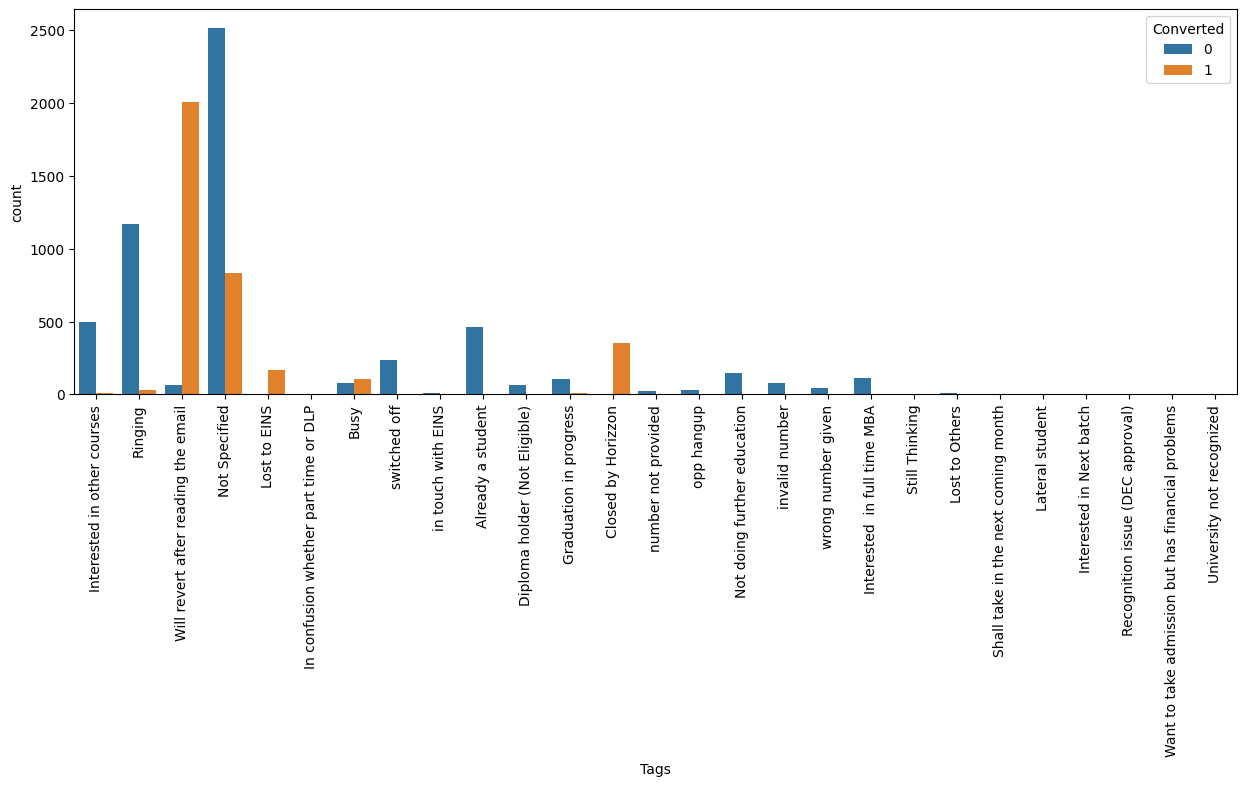

In [68]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(data = dataset, x = 'Tags', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [69]:
#replacing tags with low frequency with "Other Tags"
dataset['Tags'] = dataset['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

dataset['Tags'] = dataset['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

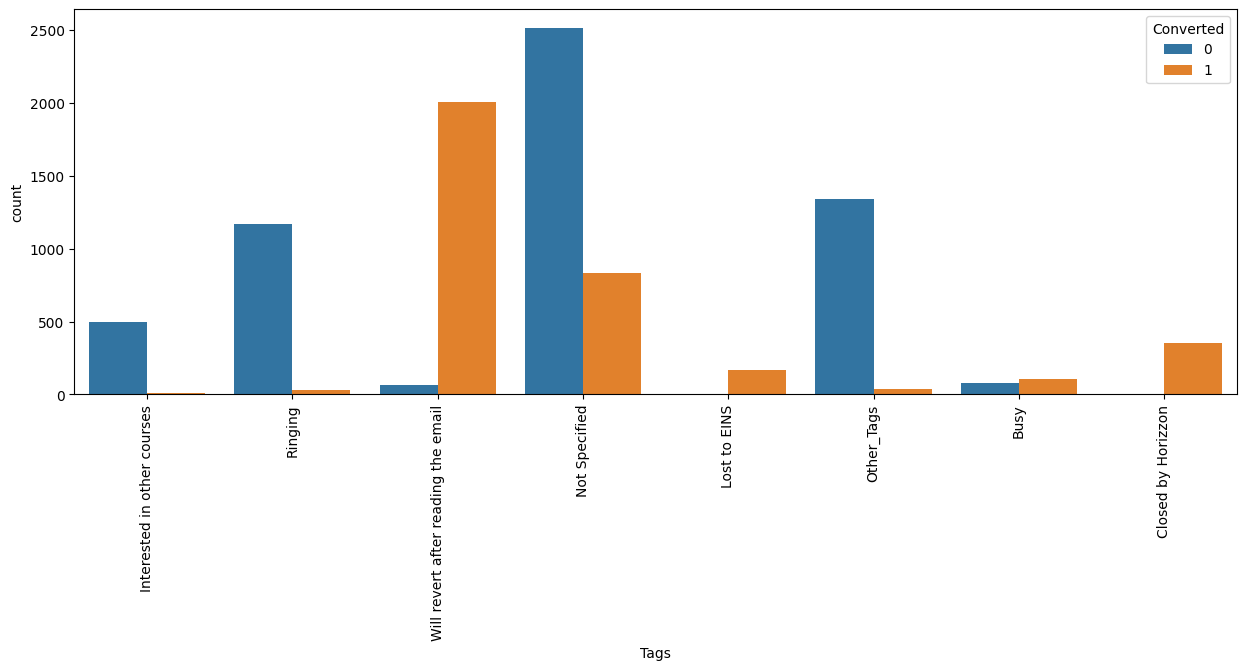

In [70]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(data = dataset, x = 'Tags', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**Lead Quality**

 This column has >45% null values so it is added in cols_to_drop list

In [71]:
dataset['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [72]:
# This column has imbalance values So we adding to the cols_to_drop List
cols_to_drop.append('Update me on Supply Chain Content')
cols_to_drop

['Prospect ID',
 'Lead Number',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Lead Profile',
 'Lead Quality',
 'How did you hear about X Education',
 'Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content']

In [73]:
dataset['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [74]:
# This column has imbalance values So we adding to the cols_to_drop List
cols_to_drop.append('Get updates on DM Content')
cols_to_drop

['Prospect ID',
 'Lead Number',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Lead Profile',
 'Lead Quality',
 'How did you hear about X Education',
 'Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content']

**Lead Profile**

 This column has >45% null values so it is added in cols_to_drop list

In [75]:
#checking value counts of "City" column

dataset['City'].value_counts(dropna=False)

not provided                   3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [76]:
dataset['City'] = dataset['City'].replace('not provided','Mumbai')

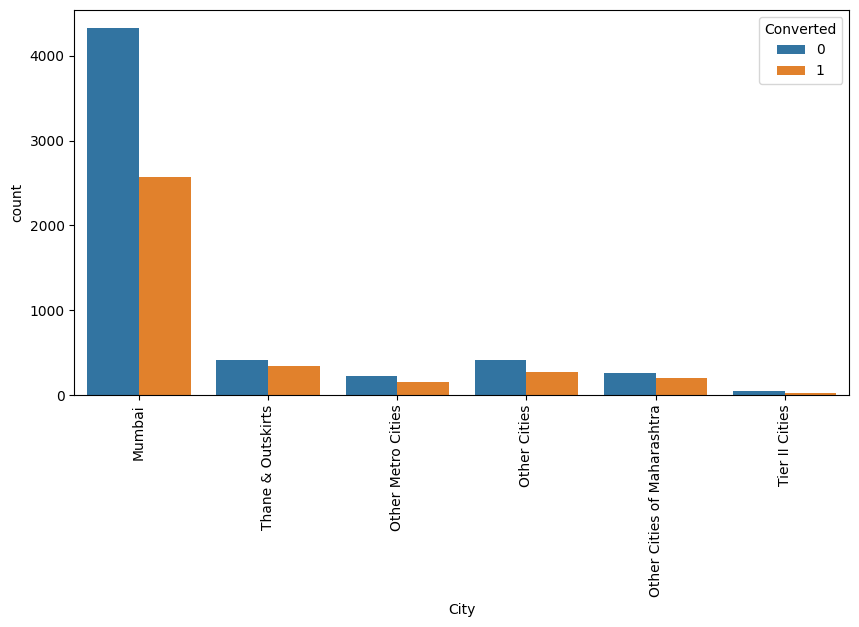

In [77]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(data = dataset, x = 'City', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


**Asymmetrique Activity Index**

**Asymmetrique Profile Score**

**Asymmetrique Activity Score**

**Asymmetrique Profile Index'**

 This columns has >45% null values so it is added in cols_to_drop list
     

In [78]:
dataset['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [79]:
# This column has imbalance values So we adding to the cols_to_drop List
cols_to_drop.append('I agree to pay the amount through cheque')
cols_to_drop

['Prospect ID',
 'Lead Number',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Lead Profile',
 'Lead Quality',
 'How did you hear about X Education',
 'Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [80]:
dataset['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [81]:
#checking value counts of last Notable Activity
dataset['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [82]:
#clubbing lower frequency values

dataset['Last Notable Activity'] = dataset['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

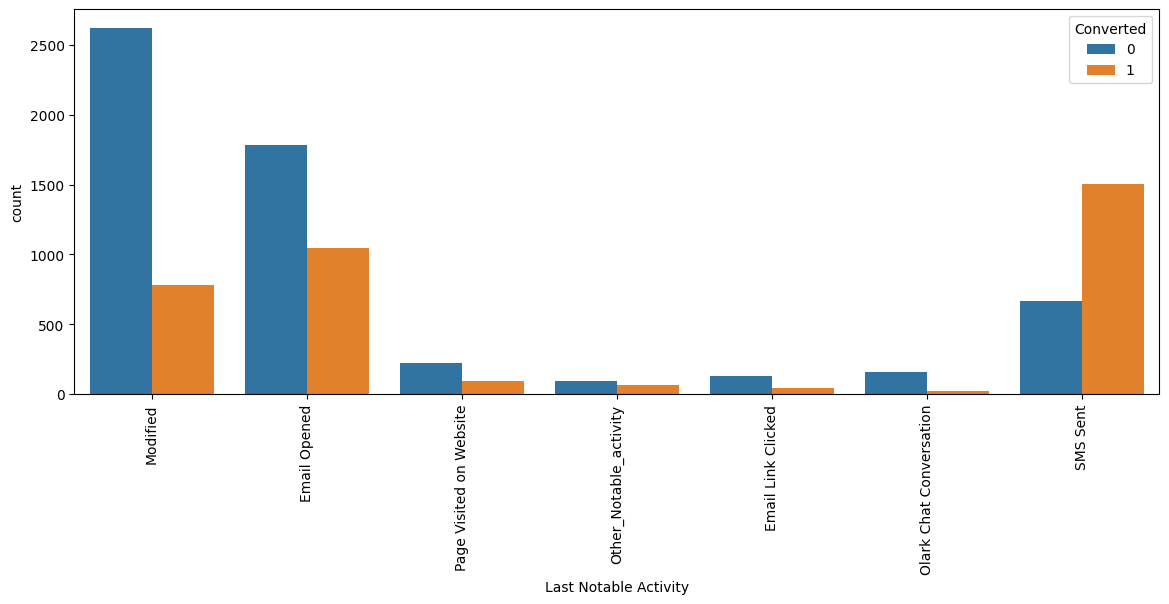

In [83]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = dataset)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [84]:
#checking value counts for variable

dataset['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

### 3.3 Removing Unwanted Columns

In [85]:
#list of columns to be dropped
cols_to_drop

['Prospect ID',
 'Lead Number',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Lead Profile',
 'Lead Quality',
 'How did you hear about X Education',
 'Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [86]:
dataset.drop(cols_to_drop, axis = 1, inplace = True)

In [87]:
dataset.shape

(9240, 15)

In [88]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(dataset['Converted'])/len(dataset['Converted'].index))*100
Converted

38.53896103896104

### 3.4 Numerical Attributes Analysis:

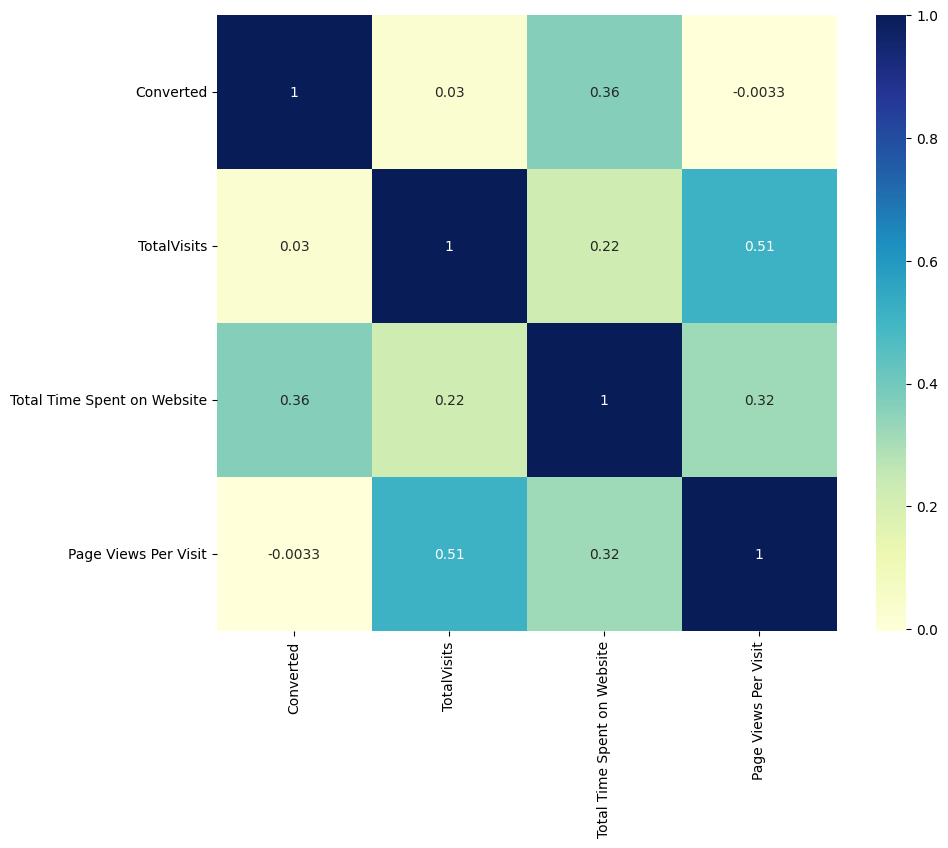

In [89]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)
plt.show()

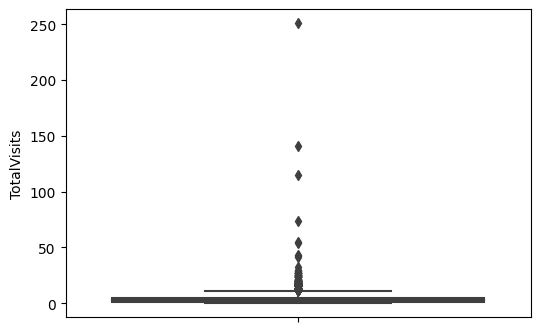

In [90]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=dataset['TotalVisits'])
plt.show()

We can see presence of outliers here

In [91]:
#checking percentile values for "Total Visits"

dataset['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

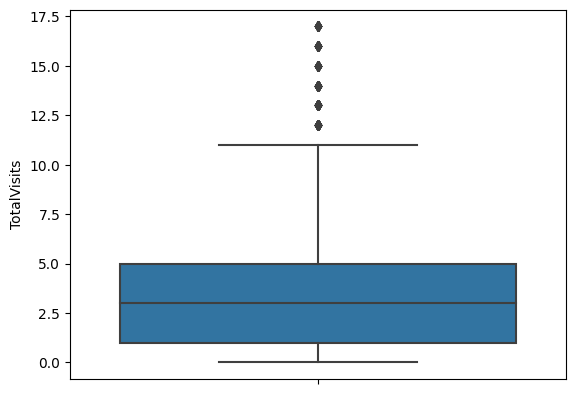

In [92]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = dataset.TotalVisits.quantile(0.99)
dataset = dataset[(dataset.TotalVisits <= Q3)]
Q1 = dataset.TotalVisits.quantile(0.01)
leads = dataset[(dataset.TotalVisits >= Q1)]
sns.boxplot(y=dataset['TotalVisits'])
plt.show()

In [93]:
dataset.shape

(9020, 15)

Check for the Next Numerical Column:

In [94]:
#checking percentiles for "Total Time Spent on Website"

dataset['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

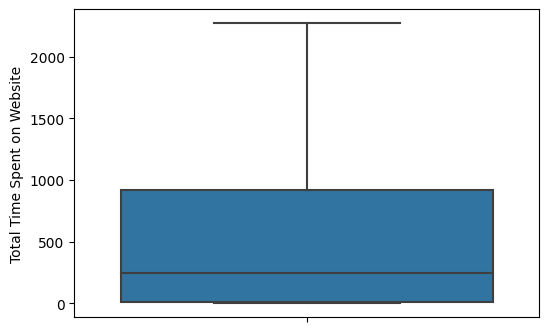

In [95]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=dataset['Total Time Spent on Website'])
plt.show()

Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column

Check for Page Views Per Visit:

In [96]:
#checking spread of "Page Views Per Visit"

dataset['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

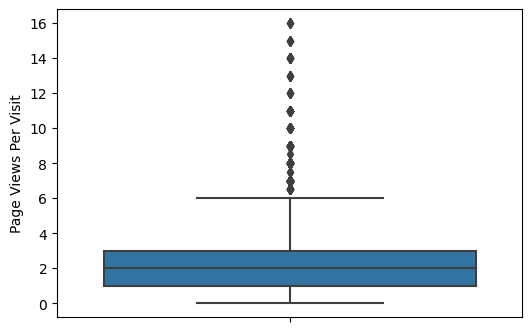

In [97]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=dataset['Page Views Per Visit'])
plt.show()

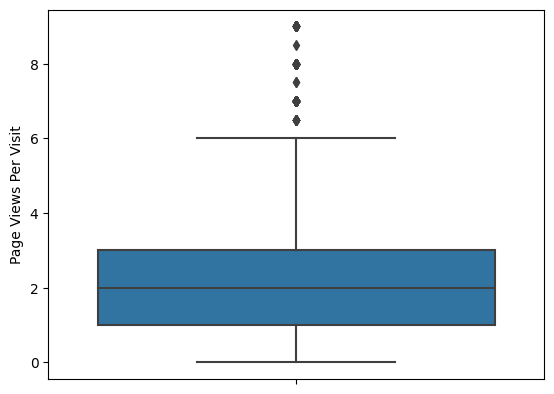

In [98]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = dataset['Page Views Per Visit'].quantile(0.99)
dataset = dataset[dataset['Page Views Per Visit'] <= Q3]
Q1 = dataset['Page Views Per Visit'].quantile(0.01)
dataset = dataset[dataset['Page Views Per Visit'] >= Q1]
sns.boxplot(y=dataset['Page Views Per Visit'])
plt.show()

In [99]:
dataset.shape

(8953, 15)

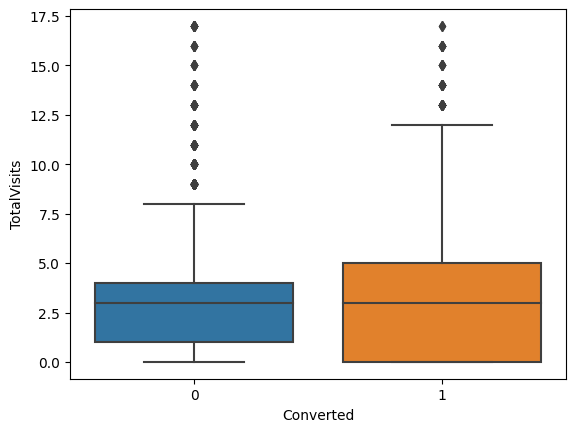

In [100]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = dataset)
plt.show()

Inference
- Median for converted and not converted leads are the close.
- Nothng conclusive can be said on the basis of Total Visits

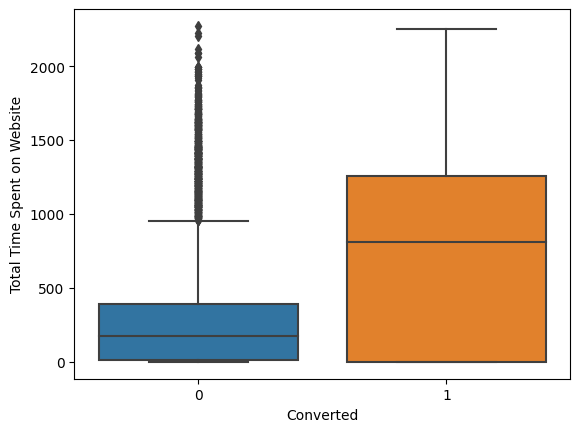

In [101]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=dataset.Converted, y=dataset['Total Time Spent on Website'])
plt.show()

Inference
- Leads spending more time on the website are more likely to be converted.
- Website should be made more engaging to make leads spend more time.

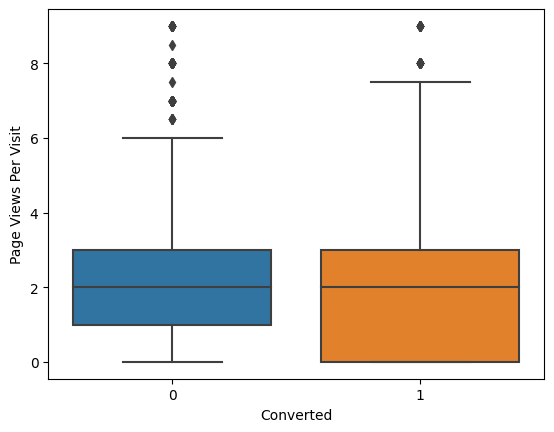

In [102]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=dataset.Converted,y=dataset['Page Views Per Visit'])
plt.show()

Inference
- Median for converted and unconverted leads is the same.
- Nothing can be said specifically for lead conversion from Page Views Per Visit

In [103]:
#checking missing values in leftover columns/

round(100*(dataset.isnull().sum()/len(dataset.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Magazine                                  0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

There are no missing values in the columns to be analyzed further

### 3.5 Dummy Variable Creation:

In [104]:
#getting a list of categorical columns

cat_cols= dataset.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Magazine', 'Tags',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [105]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
dataset[varlist] = dataset[varlist].apply(binary_map)

In [106]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(dataset[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

dataset = pd.concat([dataset,dummy],1)

In [107]:
dummy = pd.get_dummies(dataset['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
dataset = pd.concat([dataset, dummy], axis = 1)

In [108]:
dummy = pd.get_dummies(dataset['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
dataset = pd.concat([dataset, dummy], axis = 1)

In [109]:
dummy = pd.get_dummies(dataset['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
dataset = pd.concat([dataset, dummy], axis = 1)

In [110]:
dummy = pd.get_dummies(dataset['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
dataset = pd.concat([dataset, dummy], axis = 1)

In [111]:
dummy = pd.get_dummies(dataset['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
dataset = pd.concat([dataset, dummy], axis = 1)

In [112]:
#dropping the original columns after dummy variable creation

dataset.drop(cat_cols,1,inplace = True)

In [113]:
dataset.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


## <strong><span style="color:brown">Step 4: Model Building</span></strong>

### 4.1 Train-Test Split & Logistic Regression

In [114]:
# Putting response variable to y
y = dataset['Converted']

y.head()

X=dataset.drop('Converted', axis=1)

In [115]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [116]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

### Scaling of Data:

In [117]:
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


### 4.2 Model Building using Stats Model & RFE:

In [118]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [119]:
rfe.support_

array([False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True])

In [120]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 25),
 ('Lead Origin_Landing Page Submission', False, 15),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 42),
 ('What is your current occupation_Housewife', False, 19),
 ('What is your current occupation_Other', False, 36),
 ('What is your current occupation_Student', False, 22),
 ('What is your current occupation_Unemployed', False, 20),
 ('What is your current occupation_Working Professional', False, 12),
 ('What is your current occupation_not provided', True, 1),
 ('City_Other Cities', False, 24),
 ('City_Other Cities of Maharashtra', False, 31),
 ('City_Other Metro Cities', False, 41),
 ('City_Thane & Outskirts', False, 39),
 ('City_Tier II Cities', False, 18),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 38),
 ('Specialization_E-Business', False, 33),
 ('Specialization_E-COMME

In [121]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
#col = ['Lead Origin_Lead Add Form',
#       'What is your current occupation_not provided',
#       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
#       'Last Activity_SMS Sent', 'Last Notable Activity_Email Link Clicked',
#       'Last Notable Activity_Modified',
#       'Last Notable Activity_Olark Chat Conversation', 'Tags_Busy',
#       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
#       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
#       'Tags_Will revert after reading the email']

In [122]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_T

In [123]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1256.3
Date:                Tue, 18 Apr 2023   Deviance:                       2512.5
Time:                        18:35:38   Pearson chi2:                 1.19e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6046
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.4741      0.128      3.716      0.000       0.224       0.724
Lead Origin_Lead Add Form                         0.5534      0.456      1.214      0.225      -0.340       1.447
What is your current occupation_not provided     -2.4967      0.148    -16.907      0.000      -2.786      -2.207
Lead Source_Welingak Website                      2.7950      1.122      2.491      0.013       0.596       4.994
Last Activity_Email Bounced                      -1.2218      0.430     -2.840      0.005      -2.065      -0.379
Last Activity_SMS Sent                            2.1002      0.120     17.571      0.000       1.866       2.334
Last Notable Activity_Email Link Clicked         -1.5599      0.512     -3.049      0.002      -2.563      -0.557
Last Notable Activity_Modified                   -1.4634      0.125    -11.668      0.000      -1.709      -1.218
Last Notable Activity_Olark Chat Conversation    -1.7420      0.472     -3.687      0.000      -2.668      -0.816
Tags_Busy                                        -1.1762      0.244     -4.826      0.000      -1.654      -0.699
Tags_Closed by Horizzon                           5.6034      1.024      5.474      0.000       3.597       7.610
Tags_Interested in other courses                 -3.5793      0.389     -9.195      0.000      -4.342      -2.816
Tags_Lost to EINS                                 5.3683      0.626      8.580      0.000       4.142       6.595
Tags_Other_Tags                                  -4.1501      0.228    -18.173      0.000      -4.598      -3.702
Tags_Ringing                                     -5.1038      0.258    -19.815      0.000      -5.609      -4.599
Tags_Will revert after reading the email          2.8484      0.205     13.915      0.000       2.447       3.250
=================================================================================================================
"""

p-value of variable Lead Origin_Lead Add Form is high, so we can drop it.

In [124]:
#dropping column with high p-value

col = col.drop('Lead Origin_Lead Add Form',1)

In [125]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1257.0
Date:                Tue, 18 Apr 2023   Deviance:                       2514.1
Time:                        18:35:38   Pearson chi2:                 1.23e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6045
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.4835      0.127      3.795      0.000       0.234       0.733
What is your current occupation_not provided     -2.5065      0.148    -16.989      0.000      -2.796      -2.217
Lead Source_Welingak Website                      3.3398      1.028      3.248      0.001       1.324       5.355
Last Activity_Email Bounced                      -1.2342      0.432     -2.858      0.004      -2.081      -0.388
Last Activity_SMS Sent                            2.1058      0.119     17.642      0.000       1.872       2.340
Last Notable Activity_Email Link Clicked         -1.5607      0.511     -3.057      0.002      -2.561      -0.560
Last Notable Activity_Modified                   -1.4710      0.125    -11.725      0.000      -1.717      -1.225
Last Notable Activity_Olark Chat Conversation    -1.7514      0.474     -3.697      0.000      -2.680      -0.823
Tags_Busy                                        -1.1874      0.244     -4.872      0.000      -1.665      -0.710
Tags_Closed by Horizzon                           5.8044      1.014      5.723      0.000       3.816       7.792
Tags_Interested in other courses                 -3.5818      0.389     -9.198      0.000      -4.345      -2.819
Tags_Lost to EINS                                 5.3792      0.626      8.597      0.000       4.153       6.606
Tags_Other_Tags                                  -4.1538      0.228    -18.195      0.000      -4.601      -3.706
Tags_Ringing                                     -5.0951      0.257    -19.821      0.000      -5.599      -4.591
Tags_Will revert after reading the email          2.8839      0.203     14.194      0.000       2.486       3.282
=================================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Last Activity_Email Bounced,1.08
8,Tags_Closed by Horizzon,1.08
6,Last Notable Activity_Olark Chat Conversation,1.06
4,Last Notable Activity_Email Link Clicked,1.05
7,Tags_Busy,1.05
10,Tags_Lost to EINS,1.04
1,Lead Source_Welingak Website,1.03
9,Tags_Interested in other courses,0.30
11,Tags_Other_Tags,0.24
5,Last Notable Activity_Modified,0.18


There is a no any high correlation between two variables, and p values are in our desired limits so we will consider this model as final model

In [127]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.075453
4696    0.075453
3274    0.520683
2164    0.010258
1667    0.966667
7024    0.618565
8018    0.022434
778     0.199693
6942    0.005816
4440    0.116805
dtype: float64

In [128]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07545258, 0.07545258, 0.52068329, 0.01025812, 0.96666714,
       0.61856455, 0.02243418, 0.19969316, 0.00581583, 0.1168048 ])

In [129]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.075453,9196
1,0,0.075453,4696
2,0,0.520683,3274
3,0,0.010258,2164
4,1,0.966667,1667


In [130]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.075453,9196,0
1,0,0.075453,4696,0
2,0,0.520683,3274,1
3,0,0.010258,2164,0
4,1,0.966667,1667,1


In [131]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3668  214]
 [ 221 2164]]


In [132]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9305887984681666


In [133]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [134]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9073375262054507

In [135]:
# Let us calculate specificity
TN / float(TN+FP)

0.9448737764039155

In [136]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.05512622359608449


In [137]:
# positive predictive value 
print (TP / float(TP+FP))

0.9100084104289319


In [138]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9431730521985087


### 4.4 PLOTTING ROC CURVE

In [139]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [140]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

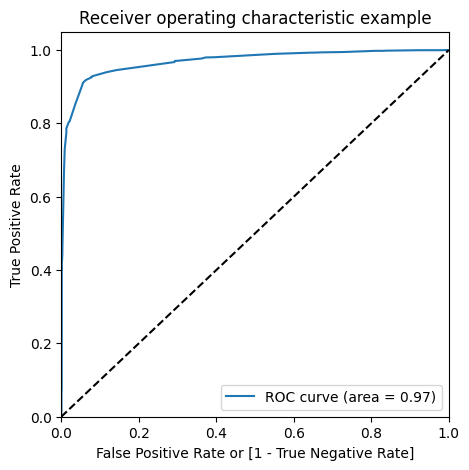

In [141]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

### 4.5 Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that: 

In [142]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.075453,9196,0,1,0,0,0,0,0,0,0,0,0
1,0,0.075453,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.520683,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.010258,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.966667,1667,1,1,1,1,1,1,1,1,1,1,1


In [143]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.807085  0.970650  0.706595
0.2   0.2  0.922451  0.929140  0.918341
0.3   0.3  0.929312  0.918658  0.935858
0.4   0.4  0.931387  0.911111  0.943843
0.5   0.5  0.930589  0.907338  0.944874
0.6   0.6  0.921334  0.851992  0.963936
0.7   0.7  0.912717  0.805451  0.978619
0.8   0.8  0.913356  0.804193  0.980422
0.9   0.9  0.890538  0.726625  0.991242


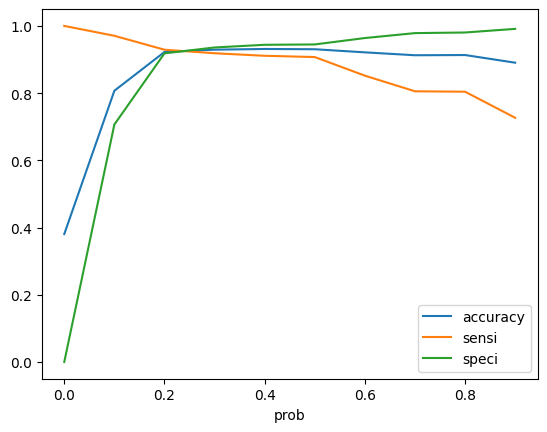

In [144]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [145]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.075453,9196,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.075453,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.520683,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.010258,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.966667,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [146]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.075453,9196,0,8
1,0,0.075453,4696,0,8
2,0,0.520683,3274,1,52
3,0,0.010258,2164,0,1
4,1,0.966667,1667,1,97


In [147]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.929312270623903

In [148]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3633,  249],
       [ 194, 2191]])

In [149]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [150]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9186582809224318

In [151]:
# Let us calculate specificity
TN / float(TN+FP)

0.9358578052550232

### Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:
- Accuracy : 92.93%
- Sensitivity : 91.86%
- Specificity : 93.58%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall. 

In [152]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.06414219474497682


In [153]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8979508196721312


In [154]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9493075516070029


In [155]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3633,  249],
       [ 194, 2191]])

In [156]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8979508196721312

In [157]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9186582809224318

In [158]:
from sklearn.metrics import precision_score, recall_score

In [159]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8979508196721312

In [160]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9186582809224318

In [161]:
from sklearn.metrics import precision_recall_curve

In [162]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

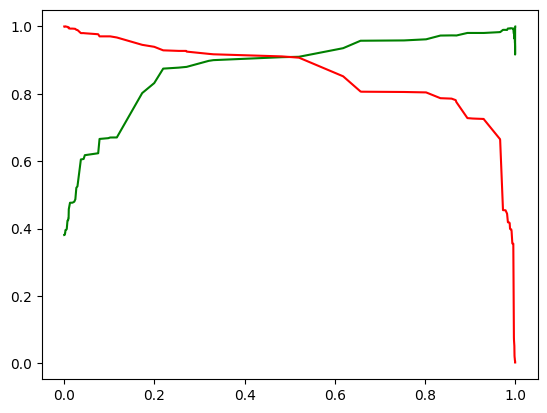

In [163]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [164]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [165]:
X_test = X_test[col]
X_test.head()

,What is your current occupation_not provided,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0,0,0,1,0,0,0,0,0,0,0,0,1,0
984,0,0,0,1,0,1,0,0,0,0,0,1,0,0
8135,1,0,0,1,0,0,0,0,0,0,0,0,0,0
6915,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2712,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [166]:
X_test_sm = sm.add_constant(X_test)

## <strong><span style="color:brown">Step 5: Model Evaluation</span></strong>

### 5.1 PREDICTIONS ON TEST SET

In [167]:
y_test_pred = res.predict(X_test_sm)

In [168]:
y_test_pred[:10]

7681    0.075453
984     0.045847
8135    0.520683
6915    0.009838
2712    0.966667
244     0.002277
4698    0.024835
8287    0.029482
6791    0.966667
8970    0.010258
dtype: float64

In [169]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [170]:
# Let's see the head
y_pred_1.head()

,0
7681,0.075453
984,0.045847
8135,0.520683
6915,0.009838
2712,0.966667


In [171]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [172]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [173]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [174]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [175]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.075453
1,0,984,0.045847
2,0,8135,0.520683
3,0,6915,0.009838
4,1,2712,0.966667


In [176]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [177]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.075453
1,0,984,0.045847
2,0,8135,0.520683
3,0,6915,0.009838
4,1,2712,0.966667


In [178]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [179]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.075453,8
1,984,0,0.045847,5
2,8135,0,0.520683,52
3,6915,0,0.009838,1
4,2712,1,0.966667,97


In [180]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [181]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.075453,8,0
1,984,0,0.045847,5,0
2,8135,0,0.520683,52,1
3,6915,0,0.009838,1,0
4,2712,1,0.966667,97,1


In [182]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9393149664929263

In [183]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1581,   95],
       [  68,  942]])

In [184]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [185]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9326732673267327

In [186]:
# Let us calculate specificity
TN / float(TN+FP)

0.9433174224343676

In [187]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.9083895853423336

In [188]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9326732673267327

### Observation:
After running the model on the Test Data these are the figures we obtain:
- Accuracy : 93.93%
- Sensitivity : 93.26%
- Specificity : 94.33%

# <strong><span style="color:brown">Final Observation </span></strong> 

Let us compare the values obtained for Train & Test:

## Train - Test
### <strong><span style="color:purple">Train Data Set:</span></strong>            

- <strong><span style="color:Green">Accuracy:</span></strong> 92.93%

- <strong><span style="color:Green">Sensitivity:</span></strong> 91.86%

- <strong><span style="color:Green">Specificity:</span></strong> 93.58%

### <strong><span style="color:purple">Test Data Set:</span></strong> 

- <strong><span style="color:Green">Accuracy:</span></strong> 93.93%

- <strong><span style="color:Green">Sensitivity:</span></strong> 93.26%

- <strong><span style="color:Green">Specificity:</span></strong> 94.33%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

## <strong><span style="color:brown">Conclusion:</span></strong>

# <strong><span style="color:brown">Recommendations </span></strong> 

### <strong><span style="color:purple">To increase our Lead Conversion Rates: </span></strong>  

- Focus on features with positive coefficients for targeted marketing strategies.
- Develop strategies to attract high-quality leads from top-performing lead sources.
- Engage working professionals with tailored messaging.
- Optimize communication channels based on lead engagement impact.
- More budget/spend can be done on Welingak Website in terms of advertising, etc.
- Incentives/discounts for providing reference that convert to lead, encourage providing more references.
- Working professionals to be aggressively targeted as they have high conversion rate and will have better financial situation to pay higher fees too. 


### <strong><span style="color:purple">To identify areas of improvement: </span></strong>  

- Analyze negative coefficients in specialization offerings.
- Review landing page submission process for areas of improvement.


